In [2]:
import pandas as pd
import os

media_sources = ["abc", "msnbc", "fox"]
years = [2016, 2020, 2024]

all_dfs = []

for media in media_sources:
    for year in years:
        path = f"../data/{media}/{media}{year}.csv"
        if os.path.exists(path):
            df = pd.read_csv(path, parse_dates=["parsed_date"])
            df["media"] = media
            df["year"] = year
            all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)

df_all["parsed_date"] = pd.to_datetime(df_all["parsed_date"], errors="coerce")
df_all = df_all.dropna(subset=["parsed_date"])
df_all["month"] = df_all["parsed_date"].dt.to_period("M")
df_all["date"] = df_all["parsed_date"].dt.date


C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\2981477727.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_all["month"] = df_all["parsed_date"].dt.to_period("M")


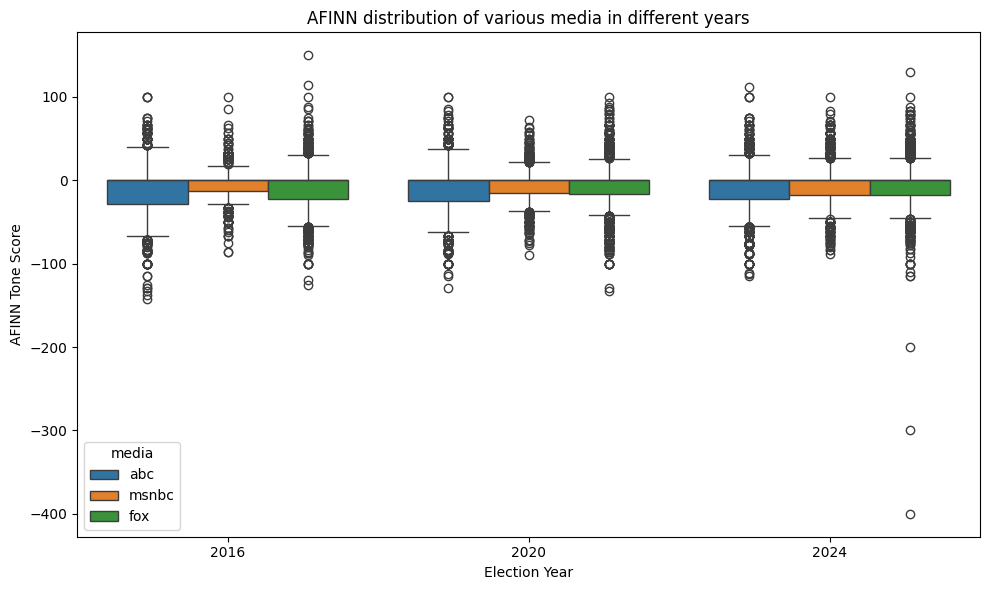

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="year", y="afinn_tone_score", hue="media", data=df_all)
plt.title("AFINN distribution of various media in different years")
plt.ylabel("AFINN Tone Score")
plt.xlabel("Election Year")
plt.tight_layout()
plt.show()


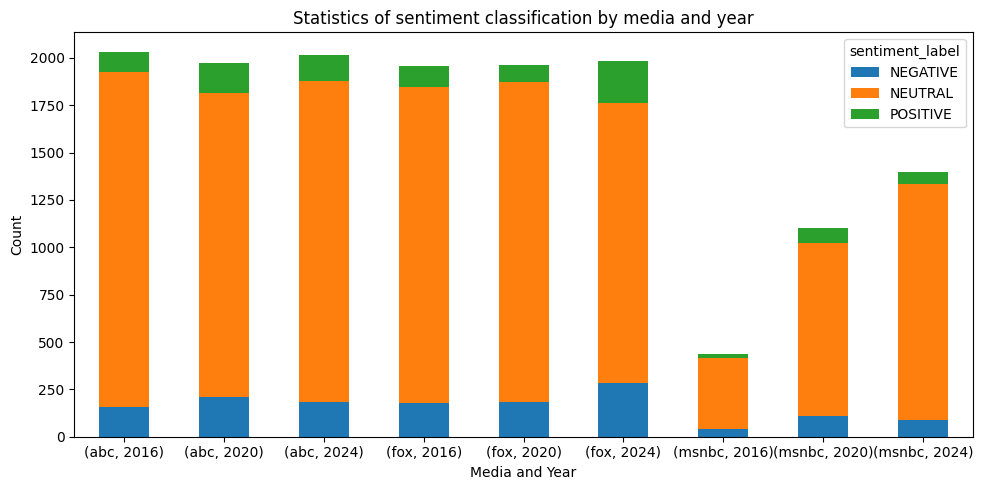

In [5]:
sentiment_count = df_all.groupby(["media", "year", "sentiment_label"]).size().unstack().fillna(0)
sentiment_count.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Statistics of sentiment classification by media and year")
plt.ylabel("Count")
plt.xlabel("Media and Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x="parsed_date", y="afinn_tone_score", hue="media", ci=None)
C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Michael\.conda\envs\dsan5400\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


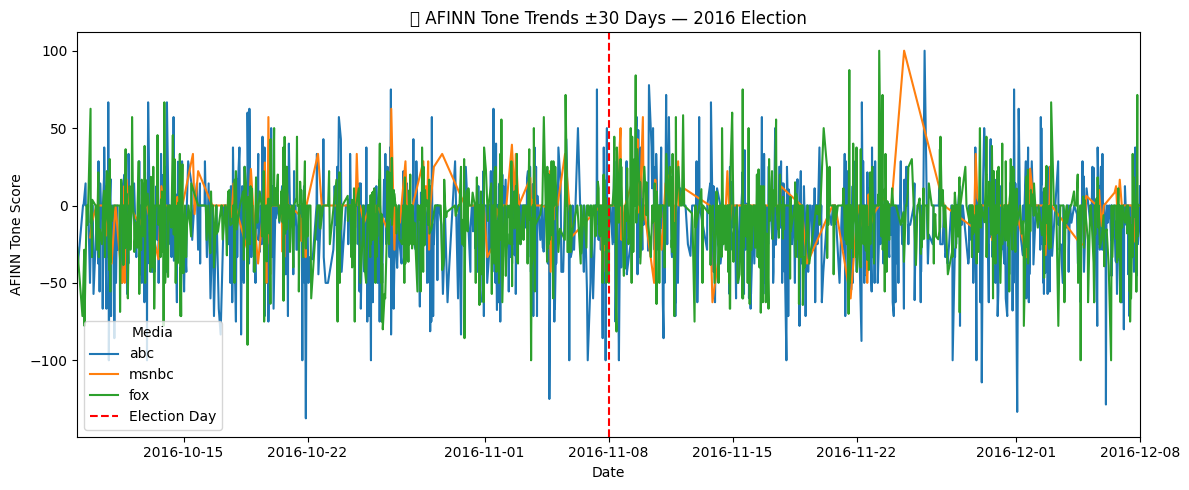

C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x="parsed_date", y="afinn_tone_score", hue="media", ci=None)
C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Michael\.conda\envs\dsan5400\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


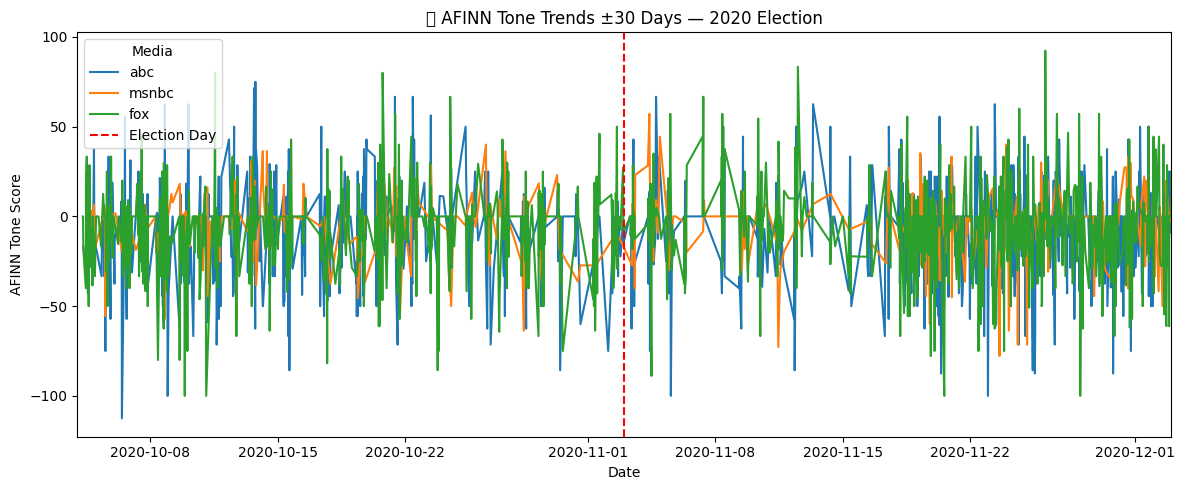

C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x="parsed_date", y="afinn_tone_score", hue="media", ci=None)
C:\Users\Michael\AppData\Local\Temp\ipykernel_19008\4199059626.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Michael\.conda\envs\dsan5400\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


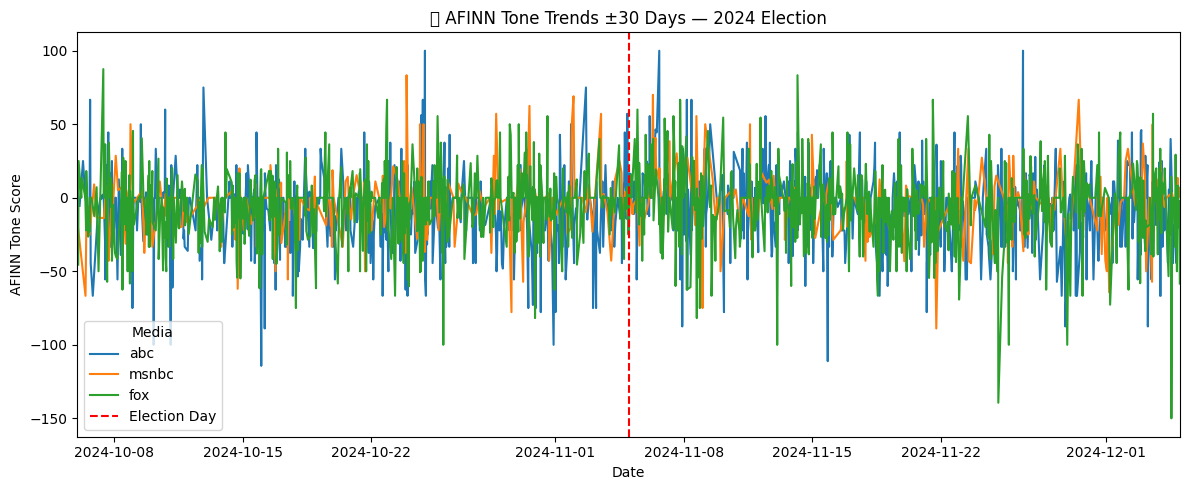

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

election_days = {
    2016: pd.to_datetime("2016-11-08"),
    2020: pd.to_datetime("2020-11-03"),
    2024: pd.to_datetime("2024-11-05")
}

for year in [2016, 2020, 2024]:
    election_day = election_days[year].tz_localize("UTC")

    mask = (df_all["parsed_date"] >= (election_day - pd.Timedelta(days=30))) & \
           (df_all["parsed_date"] <= (election_day + pd.Timedelta(days=30))) & \
           (df_all["year"] == year)
    subset = df_all.loc[mask]

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=subset, x="parsed_date", y="afinn_tone_score", hue="media", ci=None)

    plt.axvline(election_day, color="red", linestyle="--", linewidth=1.5, label="Election Day")

    plt.title(f"AFINN Tone Trends ±30 Days — {year} Election")
    plt.xlabel("Date")
    plt.ylabel("AFINN Tone Score")
    plt.legend(title="Media")
    plt.xlim(election_day - pd.Timedelta(days=30), election_day + pd.Timedelta(days=30))
    plt.tight_layout()
    plt.show()


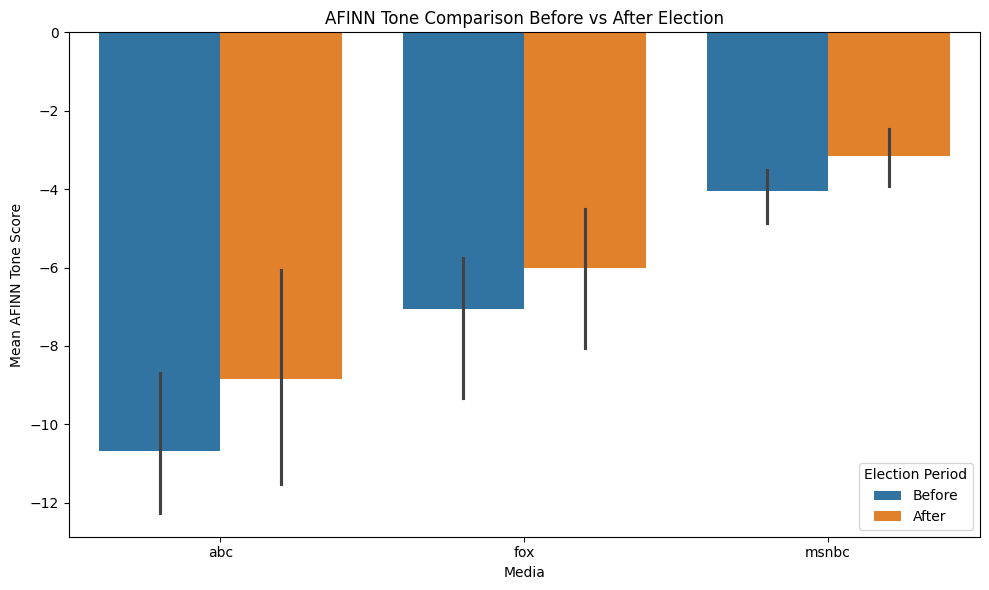

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

election_days = {
    2016: pd.to_datetime("2016-11-08").tz_localize("UTC"),
    2020: pd.to_datetime("2020-11-03").tz_localize("UTC"),
    2024: pd.to_datetime("2024-11-05").tz_localize("UTC")
}

df_all["election_period"] = "outside"

for year, date in election_days.items():
    before_mask = (df_all["year"] == year) & (df_all["parsed_date"] >= (date - pd.Timedelta(days=30))) & (df_all["parsed_date"] < date)
    after_mask  = (df_all["year"] == year) & (df_all["parsed_date"] > date) & (df_all["parsed_date"] <= (date + pd.Timedelta(days=30)))

    df_all.loc[before_mask, "election_period"] = "Before"
    df_all.loc[after_mask, "election_period"] = "After"

election_df = df_all[df_all["election_period"].isin(["Before", "After"])]

mean_afinn = election_df.groupby(["year", "media", "election_period"])["afinn_tone_score"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_afinn,
    x="media",
    y="afinn_tone_score",
    hue="election_period",
    hue_order=["Before", "After"]
)
plt.title("AFINN Tone Comparison Before vs After Election")
plt.ylabel("Mean AFINN Tone Score")
plt.xlabel("Media")
plt.legend(title="Election Period")
plt.tight_layout()
plt.show()

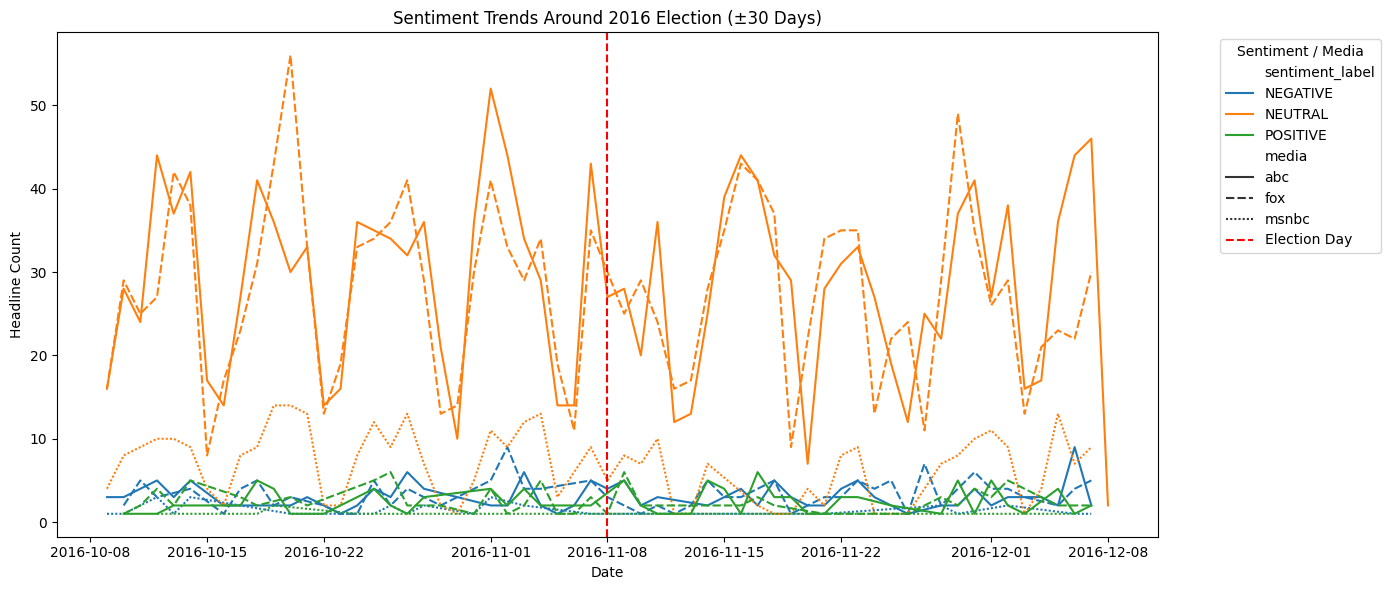

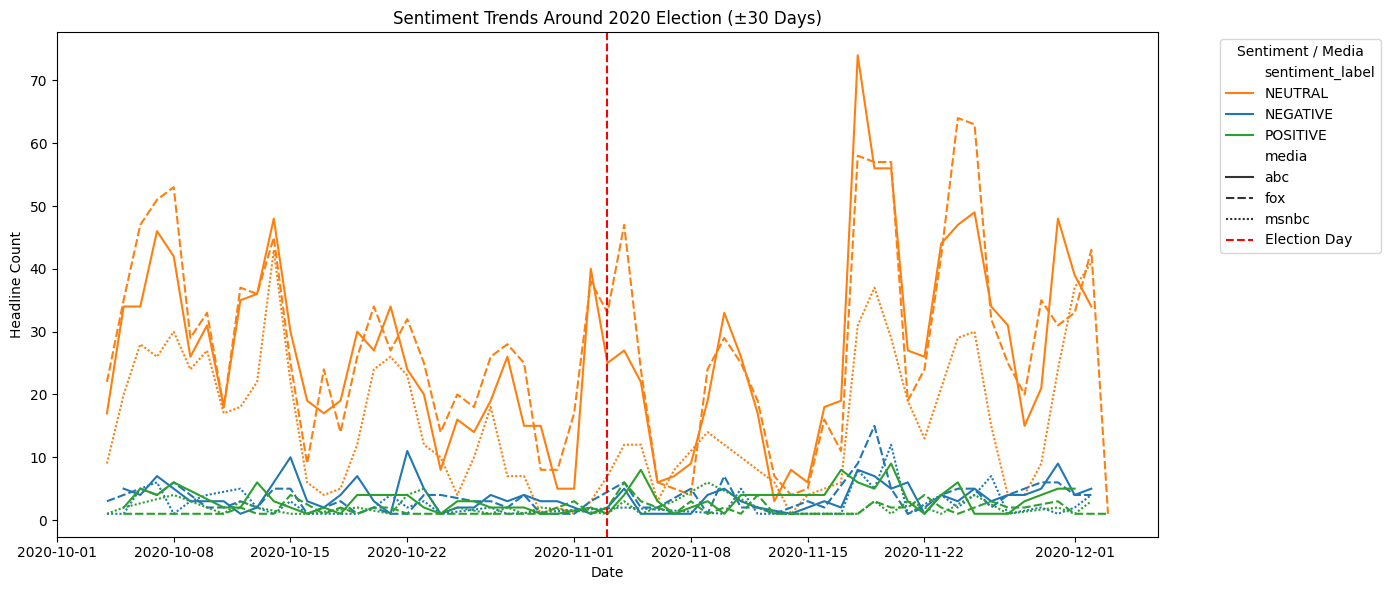

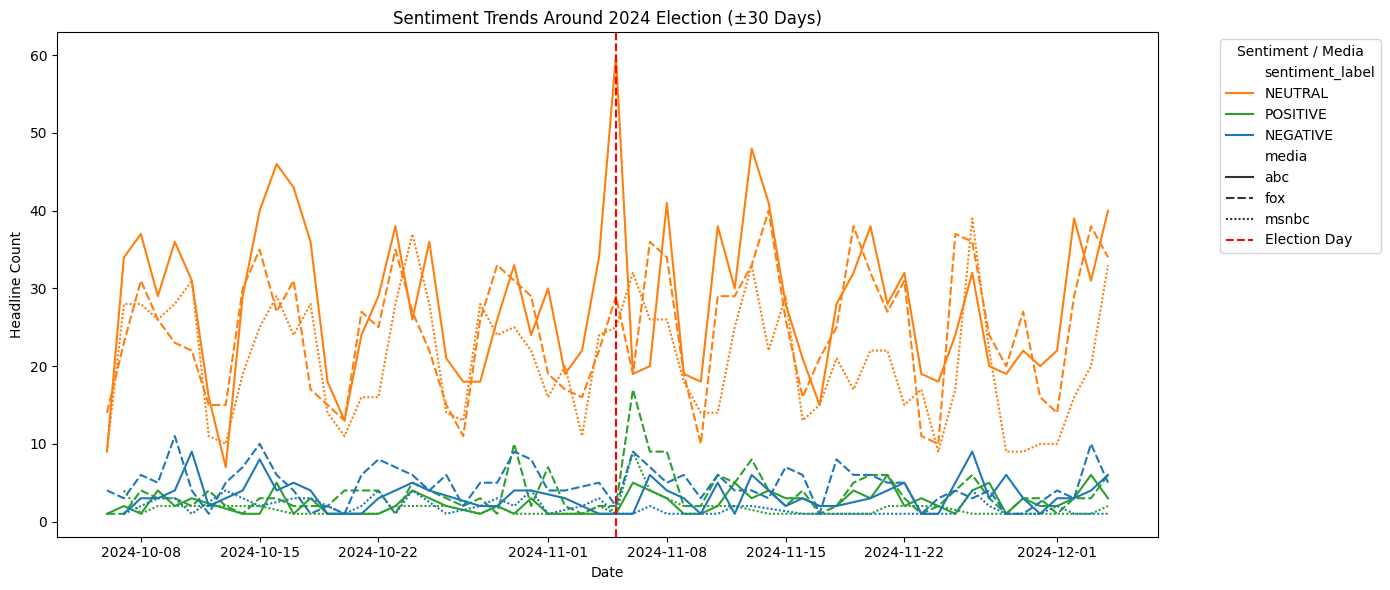

In [17]:
palette = {
    "POSITIVE": "#2ca02c",  # green
    "NEUTRAL": "#ff7f0e",   # orange
    "NEGATIVE": "#1f77b4"   # blue
}

for year, election_day in election_days.items():
    mask = (
        (df_all["year"] == year) &
        (df_all["parsed_date"] >= (election_day - pd.Timedelta(days=30))) &
        (df_all["parsed_date"] <= (election_day + pd.Timedelta(days=30)))
    )
    subset = df_all[mask]

    df_sent_time = subset.groupby(["date", "media", "sentiment_label"]).size().reset_index(name="count")

    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_sent_time,
        x="date", y="count",
        hue="sentiment_label", style="media",
        palette=palette
    )

    plt.axvline(election_day.date(), color="red", linestyle="--", linewidth=1.5, label="Election Day")
    plt.title(f"Sentiment Trends Around {year} Election (±30 Days)")
    plt.ylabel("Headline Count")
    plt.xlabel("Date")
    plt.legend(title="Sentiment / Media", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


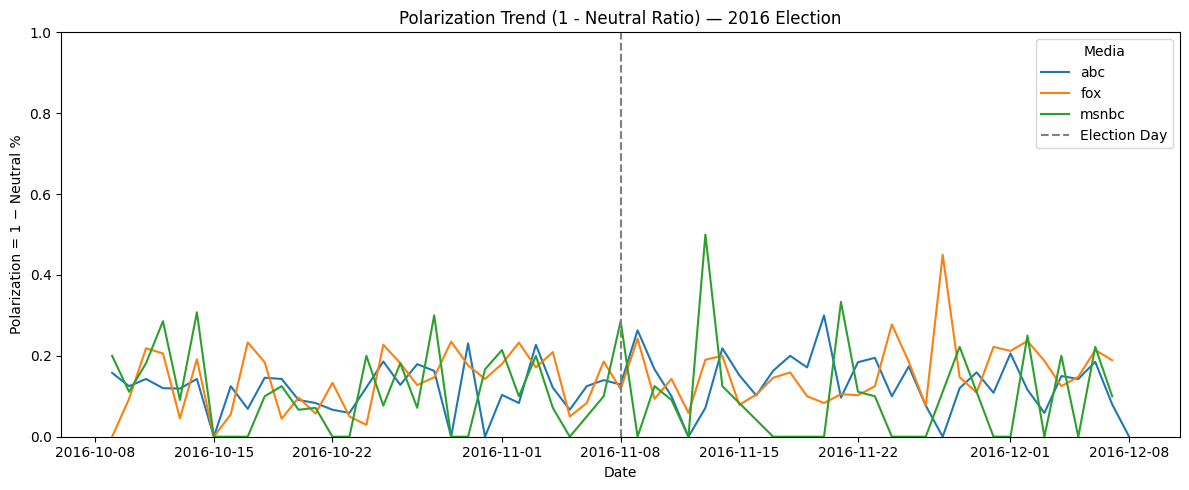

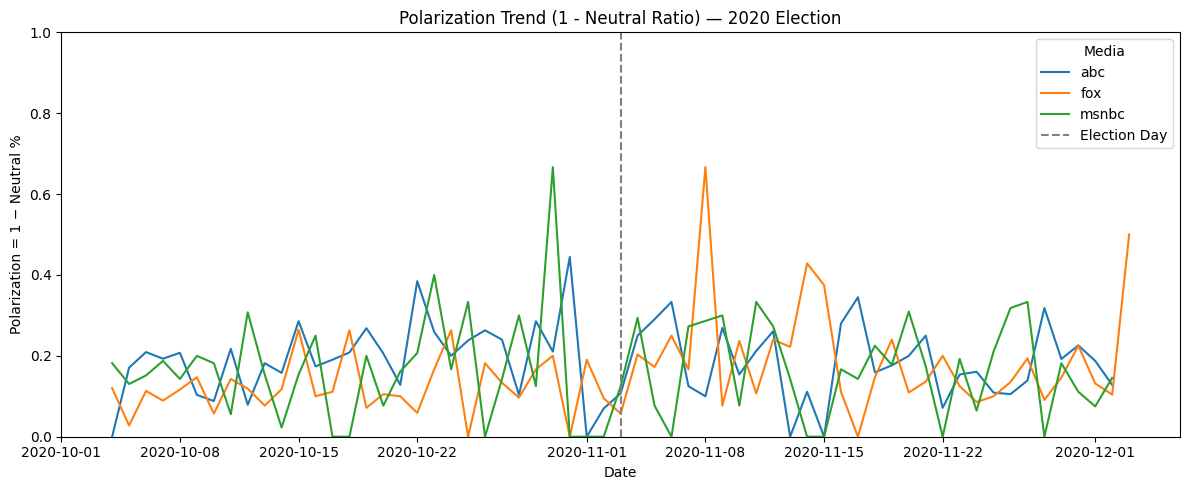

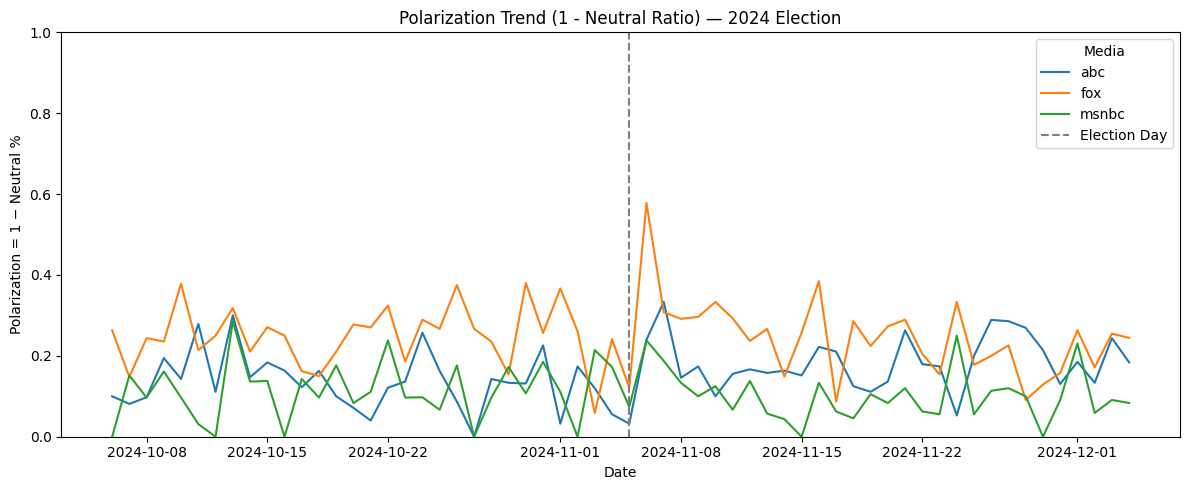

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 大选日设定
election_days = {
    2016: pd.to_datetime("2016-11-08").tz_localize("UTC"),
    2020: pd.to_datetime("2020-11-03").tz_localize("UTC"),
    2024: pd.to_datetime("2024-11-05").tz_localize("UTC")
}

for year, election_day in election_days.items():
    # 选举 ±30 天的数据
    start = election_day - pd.Timedelta(days=30)
    end = election_day + pd.Timedelta(days=30)
    subset = df_all[
        (df_all["year"] == year) &
        (df_all["parsed_date"] >= start) &
        (df_all["parsed_date"] <= end)
    ].copy()

    subset["date"] = subset["parsed_date"].dt.date

    # 每天每媒体极化值 = 1 - neutral 占比
    daily = (
        subset.groupby(["date", "media"])["sentiment_label"]
        .value_counts()
        .unstack()
        .fillna(0)
        .reset_index()
    )

    daily["total"] = daily[["POSITIVE", "NEGATIVE", "NEUTRAL"]].sum(axis=1)
    daily["polarization"] = 1 - (daily.get("NEUTRAL", 0) / daily["total"])

    # 画图
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=daily, x="date", y="polarization", hue="media")
    plt.axvline(election_day.date(), color="gray", linestyle="--", label="Election Day")
    plt.title(f"Polarization Trend (1 - Neutral Ratio) — {year} Election")
    plt.ylabel("Polarization = 1 − Neutral %")
    plt.xlabel("Date")
    plt.ylim(0, 1)
    plt.legend(title="Media")
    plt.tight_layout()
    plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 再确认 election_days 是日期类型
election_days = {
    2016: pd.to_datetime("2016-11-08").tz_localize("UTC"),
    2020: pd.to_datetime("2020-11-03").tz_localize("UTC"),
    2024: pd.to_datetime("2024-11-05").tz_localize("UTC")
}

# 统计结果保存
agg_results = []

for year, election_day in election_days.items():
    start = election_day - pd.Timedelta(days=30)
    end = election_day + pd.Timedelta(days=30)

    # 限定该年 ±30 天数据
    subset = df_all[
        (df_all["year"] == year) &
        (df_all["parsed_date"] >= start) &
        (df_all["parsed_date"] <= end)
    ].copy()

    # 处理时间 & 阶段
    subset["date"] = subset["parsed_date"].dt.date
    subset["election_period"] = subset["parsed_date"].apply(
        lambda x: "Before" if x < election_day else "After"
    )

    # 统计每个 media + period 的情绪总数
    grouped = (
        subset.groupby(["media", "election_period"])["sentiment_label"]
        .value_counts()
        .unstack(fill_value=0)
        .reset_index()
    )

    # 添加年份 & 极化值
    grouped["year"] = year
    grouped["total"] = grouped[["POSITIVE", "NEUTRAL", "NEGATIVE"]].sum(axis=1)
    grouped["polarization"] = 1 - (grouped["NEUTRAL"] / grouped["total"])

    agg_results.append(grouped)

# 合并结果
polar_agg = pd.concat(agg_results, ignore_index=True)


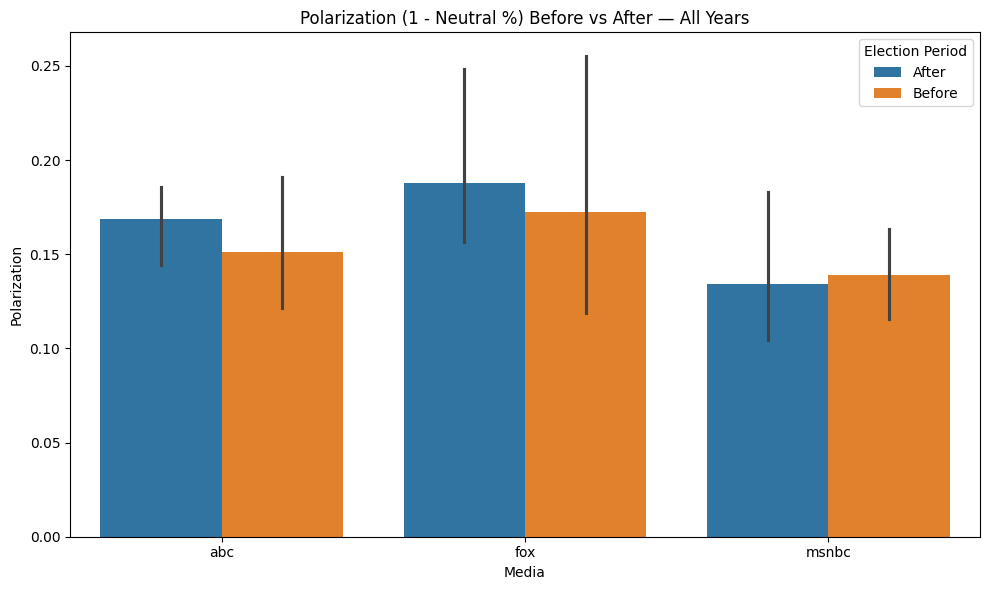

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=polar_agg, x="media", y="polarization", hue="election_period")
plt.title("Polarization (1 - Neutral %) Before vs After — All Years")
plt.ylabel("Polarization")
plt.xlabel("Media")
plt.legend(title="Election Period")
plt.tight_layout()
plt.show()


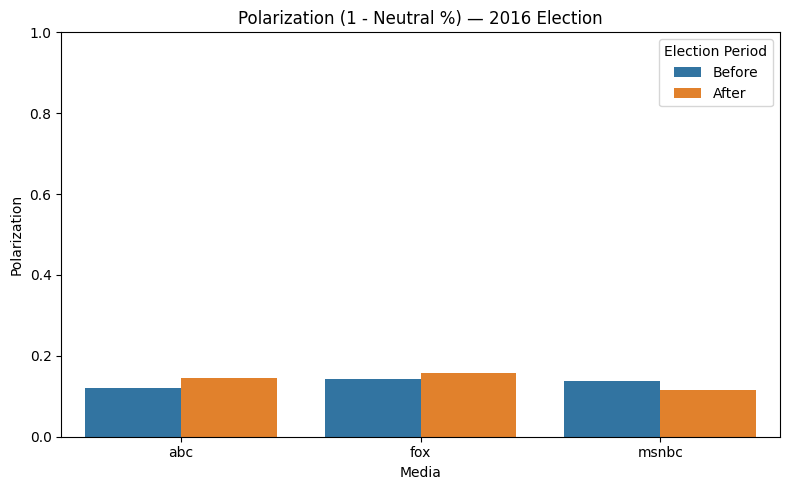

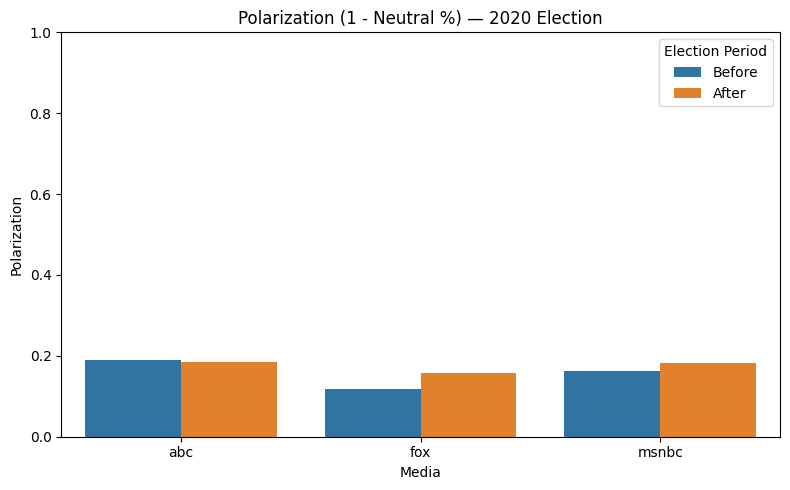

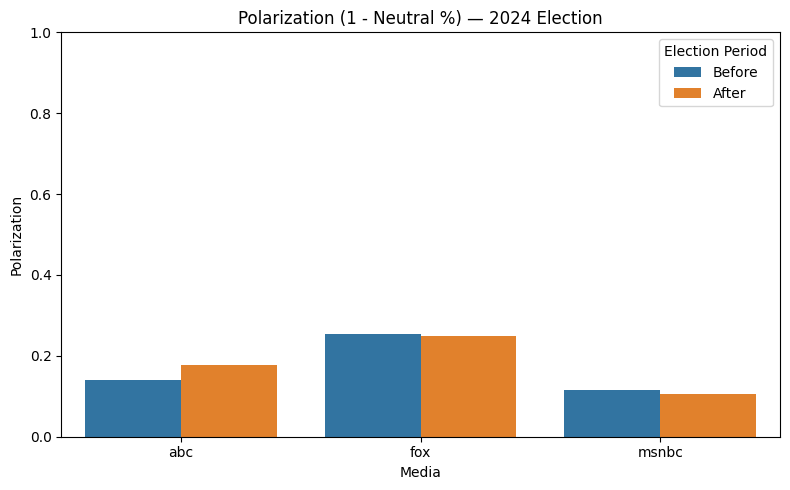

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

for year in [2016, 2020, 2024]:
    subset = polar_agg[polar_agg["year"] == year]

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=subset,
        x="media",
        y="polarization",
        hue="election_period",
        hue_order=["Before", "After"]
    )
    plt.title(f"Polarization (1 - Neutral %) — {year} Election")
    plt.ylabel("Polarization")
    plt.xlabel("Media")
    plt.ylim(0, 1)
    plt.legend(title="Election Period")
    plt.tight_layout()
    plt.show()


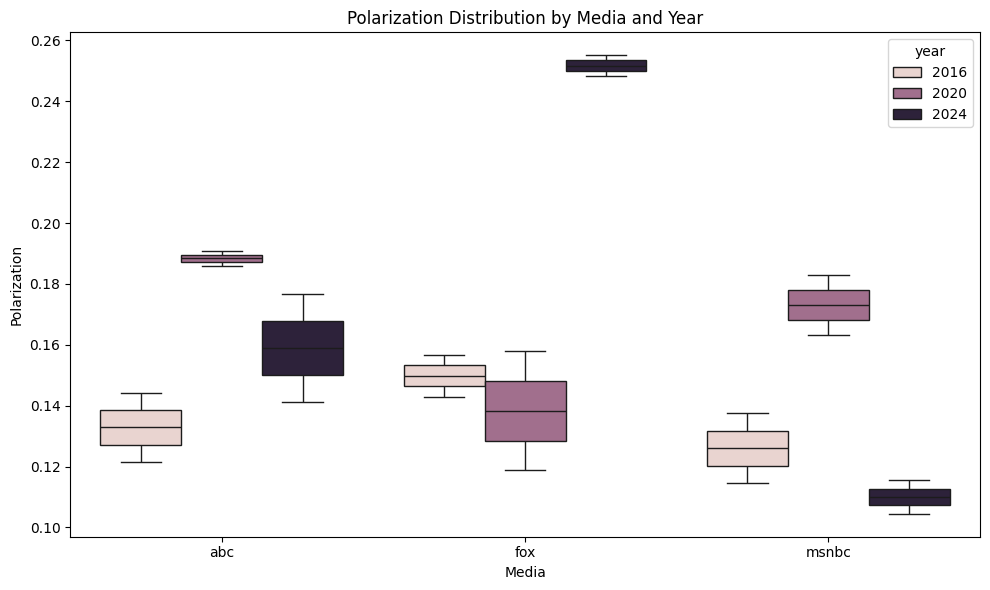

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=polar_agg, x="media", y="polarization", hue="year")
plt.title("Polarization Distribution by Media and Year")
plt.ylabel("Polarization")
plt.xlabel("Media")
plt.tight_layout()
plt.show()
